Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

In [86]:
import os
from pprint import pprint
import covsirphy as cs
import seaborn as sns
sns.set()
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import matplotlib.dates as mdates
import pickle
import numpy as np
from itertools import cycle

%matplotlib inline

rcParams['figure.figsize'] = 8.5, 5
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.style.use('seaborn')

cs.__version__

'2.13.3'

In [2]:
import covsirphy as cs

# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu(verbose=False)
population_data = data_loader.population(verbose=False)

# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
print(oxcgrt_data.citation)

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan
(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [3]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)


196

In [4]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [5]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Solomon Islands', 'Holy See'],
 3: ['Timor-Leste'],
 4: ['Saint Kitts and Nevis', 'Dominica', 'Tanzania'],
 5: ['Fiji', 'Brunei'],
 6: ['Grenada', 'Equatorial Guinea'],
 7: ['Mauritius', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda',
     'Cambodia', 'Saint Lucia'],
 8: ['Bahamas', 'Northern Mariana Islands', 'Sao Tome and Principe',
     'Madagascar', 'Kyrgyzstan', 'Gambia'],
 9: ['Liechtenstein', 'Libya', 'Republic of the Congo', 'Philippines',
     'Uzbekistan', 'Botswana', 'Zimbabwe', 'Papua New Guinea', 'Seychelles',
     'Vietnam', 'Jamaica', 'Australia', 'Angola', 'Ethiopia',
     'Trinidad and Tobago'],
 10: ['Benin', 'Zambia', 'India', 'Belize', 'Singapore', 'Guam', 'Iraq',
      'Guatemala', 'Monaco', 'Bahrain', 'Kenya', 'Bolivia', 'Kazakhstan',
      'Ghana', 'Iceland', 'Virgin Islands, U.S.', 'Malawi', 'Guyana', 'Bhutan',
      'Lesotho', 'Oman', 'Algeria', 'Djibouti', 'Venezuela'],
 11: ['Bangladesh', 'Syria', 'Paraguay', 'Bermuda', 'Israel', 'Sen

In [6]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

10

In [7]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Switzerland', 'Italy', 'Sweden', 'Romania', 'Norway'],
 18: ['United Kingdom', 'Canada', 'Portugal', 'Netherlands'],
 19: ['Germany']}


In [66]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [9]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  109 trials in 0 min 10 sec
	ROU, 12th phase (25Nov2020 - 02Dec2020): finished  103 trials in 0 min 10 sec
	CAN, 16th phase (27Dec2020 - 01Jan2021): finished   95 trials in 0 min 10 sec
	CAN, 15th phase (20Dec2020 - 26Dec2020): finished   92 trials in 0 min 10 sec
	CHE, 10th phase (09Nov2020 - 14Nov2020): finished   94 trials in 0 min 10 sec
	CAN,  2nd phase (02May2020 - 25May2020): finished   97 trials in 0 min 10 sec
	NLD,  6th phase (09Oct2020 - 15Oct2020): finished  100 trials in 0 min 10 sec
	ITA,  7th phase (16Oct2020 - 22Oct2020): finished   98 trials in 0 min 10 sec
	ITA,  3rd phase (17Apr2020 - 11May2020): finished  101 trials in 0 min 10 sec
	ITA,  9th phase (02Nov2020 - 11Nov2020): finished  110 trials in 0 min 10 sec
	NLD, 12th phase (19Nov2020 - 26Nov2020): finished  112 trials in 0 min 10 sec
	CHE,  9th phase (30Oct2020 - 08Nov2020): finished  111 tr

	ROU,  5th phase (24Sep2020 - 08Oct2020): finished  136 trials in 0 min 10 sec
	GBR,  1st phase (09Apr2020 - 29Apr2020): finished  131 trials in 0 min 10 sec
	DEU,  9th phase (28Oct2020 - 03Nov2020): finished  128 trials in 0 min 10 sec
	NLD,  0th phase (11Mar2020 - 05Apr2020): finished  131 trials in 0 min 10 sec
	ROU,  6th phase (09Oct2020 - 19Oct2020): finished  147 trials in 0 min 10 sec
	GBR,  2nd phase (30Apr2020 - 25May2020): finished  138 trials in 0 min 10 sec
	NLD, 10th phase (03Nov2020 - 10Nov2020): finished  148 trials in 0 min 10 sec
	ITA, 13th phase (10Dec2020 - 15Dec2020): finished  140 trials in 0 min 10 sec
	GBR, 13th phase (26Nov2020 - 04Dec2020): finished  146 trials in 0 min 10 sec
	DEU,  0th phase (14Jan2020 - 22Mar2020): finished  136 trials in 0 min 10 sec
	SWE,  5th phase (13Aug2020 - 04Oct2020): finished  136 trials in 0 min 10 sec
	CHE, 14th phase (11Dec2020 - 20Dec2020): finished  142 trials in 0 min 10 sec
	NLD, 13th phase (27Nov2020 - 04Dec2020): finished  

### $Rt$: Reprodcution number $\mathrm{[-]}$

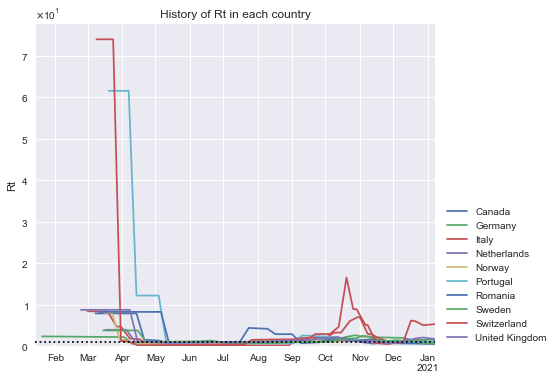

In [82]:
analyser.history("Rt", roll_window=7);

### $\rho$: Effective contact rate $\mathrm{[-]}$

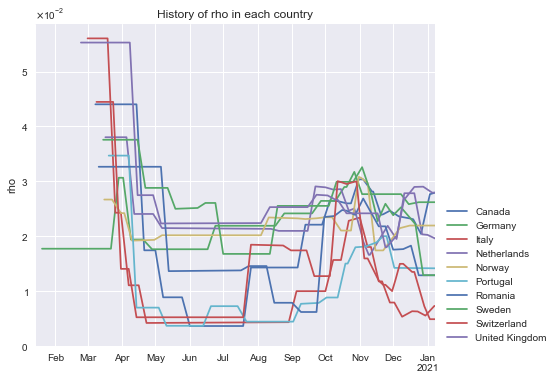

In [81]:
analyser.history("rho", roll_window=7);

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [94]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()

In [88]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.143859,-0.054937,0.374783,-0.334367,-0.118432,-0.121486,-0.045070,-0.182616,-0.148631,-0.145122,-0.165701,-0.168752,-0.085115,-0.203010,-0.124139,-0.155832
theta,-0.143859,1.000000,0.062656,-0.502999,-0.176364,0.270350,0.024122,0.133067,-0.085645,0.263881,0.006957,0.175760,0.062919,0.015048,-0.059087,0.171794,-0.053413
kappa,-0.054937,0.062656,1.000000,0.093700,0.041977,0.165363,0.028077,-0.062996,0.036592,-0.006675,-0.061451,0.048824,-0.257273,0.025512,-0.129657,-0.042413,0.032484
rho,0.374783,-0.502999,0.093700,1.000000,0.098635,-0.360169,-0.240350,-0.184508,-0.178428,-0.195852,-0.225027,-0.234317,-0.350477,-0.076972,-0.285222,-0.186209,-0.152147
sigma,-0.334367,-0.176364,0.041977,0.098635,1.000000,-0.026651,0.095953,0.170678,0.365515,0.074042,-0.000929,0.080852,0.045770,0.150049,0.041056,-0.101809,0.224779
School_closing,-0.118432,0.270350,0.165363,-0.360169,-0.026651,1.000000,0.427044,0.092891,0.165885,0.042075,0.397776,0.229012,0.250327,0.302449,0.168238,0.144805,0.453206
Workplace_closing,-0.121486,0.024122,0.028077,-0.240350,0.095953,0.427044,1.000000,0.203530,0.686589,0.206080,0.608363,0.397995,0.214218,0.335297,0.191176,-0.048180,0.745544
Cancel_events,-0.045070,0.133067,-0.062996,-0.184508,0.170678,0.092891,0.203530,1.000000,0.382213,0.391520,0.348329,0.643634,0.103057,0.367502,-0.037784,0.035245,0.322408
Gatherings_restrictions,-0.182616,-0.085645,0.036592,-0.178428,0.365515,0.165885,0.686589,0.382213,1.000000,0.234183,0.475722,0.413789,0.256648,0.381238,0.190263,-0.075847,0.770508
Transport_closing,-0.148631,0.263881,-0.006675,-0.195852,0.074042,0.042075,0.206080,0.391520,0.234183,1.000000,0.323302,0.607133,-0.094374,0.146662,-0.141658,-0.091668,0.328789


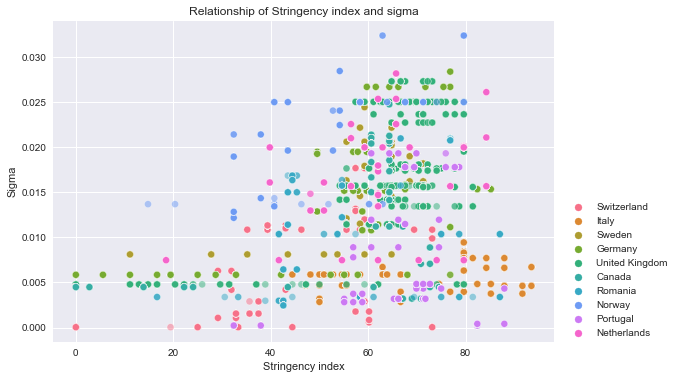

In [97]:
df_subset = track_df.copy()

# Scatter plot of Stringency index and interest 
sns.scatterplot(data=df_subset, x="Stringency_index", y="sigma", hue="Country", legend="brief", marker="o", s=50, alpha=0.5)
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and sigma")
plt.ylabel("Sigma")
plt.xlabel("Stringency index")
plt.show()

## Correlation between ODE parameters and Stringency Index with delay

In this graph, it can be seen that the correlation between Stringency Index and the ODE parameters increasing along with time, which is as expected. However, it also becomes clear that the correlation coefficiënt eventually decreases in strength after a few days. 

By shifting the timeseries data by a certain number of days, the relationship between the Stringency Index and the ODE parameters can be analyzed with a delay in time. It is expected that there is a negative correlation between the reproduction number and stringency index and that this correlation gets stronger after 10-14 days. However, for some countries' data, Rt rises again after about 30 days. 
For example, for Romania, the correlation coefficiënt between Stringency Index and reproduction number rises again after about 33 days. 

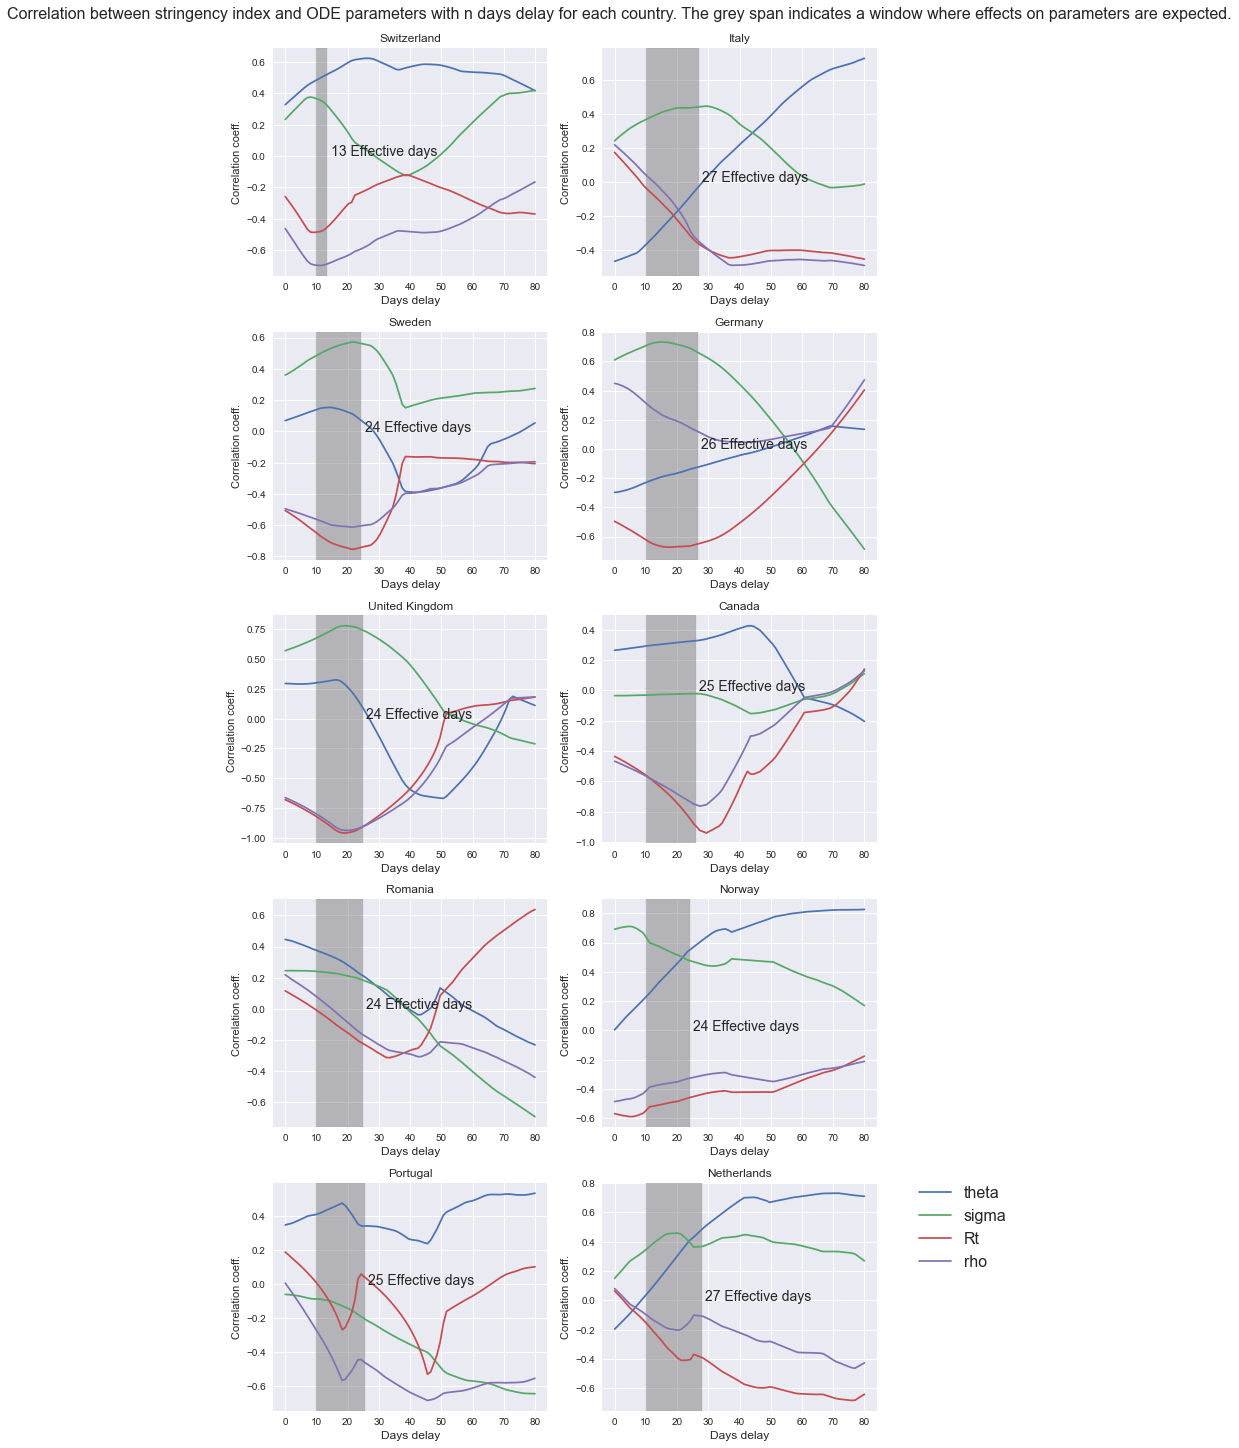

In [122]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

# Max number of days to delay effect
max_delay_days = 80
incubation_period = 10

meds = []
countries = df_subset["Country"].unique()
variables = ["theta", "sigma", "Rt", "rho"] # Excluded kappa
nrow, ncol = 5, 2
colors = map('C{}'.format, cycle(range(nrow*ncol)))
fig, axs = plt.subplots(nrow,ncol,figsize=(ncol*5.5, nrow*4), constrained_layout=True);
fig.suptitle("Correlation between stringency index and ODE parameters with n days delay for each country. \
The grey span indicates a window where effects on parameters are expected.", fontsize=16)

for country, ax in zip(countries, axs.flatten()):
    for var in variables:
        df_country = df_subset[df_subset["Country"] == country] 
        
        # Calculate mean of the given parameter for each day
        grouped = df_country.groupby("Date").mean()
        
        # Calculate correlation for several days of delay until max_delay is reached
        xcov_monthly = [crosscorr(grouped[var], grouped["Stringency_index"], lag=i) for i in range(max_delay_days)]

        # Variables theta, sigma and kappa are expected to increase, whereas
        # Rt and rho are expected to decrease after policy measures are taken
        if var == "theta" or var == "sigma" or var == "kappa":
            meds.append(np.argmax(xcov_monthly[:60]))
        else:
            meds.append(np.argmin(xcov_monthly[:60]))
        
        ax.plot(np.linspace(0, max_delay_days, num=max_delay_days), xcov_monthly);
        ax.set_xlabel("Days delay", fontsize=12)
        ax.set_ylabel("Correlation coeff.")
        ax.set_title(country)
    ax.text(np.mean(meds) + 1, 0, str(int(np.mean(meds))) + " Effective days")
    ax.axvspan(incubation_period, np.mean(meds), alpha=0.5, color='grey')
    
ax.legend(variables, bbox_to_anchor=(1.1, 1.05), fontsize=16)
plt.show()
